# Making bets

Here we are testing how much money our neural network would make or lose when it's used for making bets.

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

model = load_model('modules/neural_network/neural_network.h5')

data = pd.read_csv("datasets/data.csv")
data = data.sort_values(['season', 'month'], ascending=(True, True))
test = data[(data['season'] == 2015) & (data['month'] > 8)]

y_test = test.loc[:, 'label']
X_test = test.drop('label', axis=1)

bookmakers = ["B365", "BW", "IW", "LB", "WH", "VC"]

Using TensorFlow backend.


## Make constant predictions

In [3]:
def predict_constant(X_test, y_test, constant_pred, bookmaker):
    # total money
    money = 0
    # how much money we are betting on each match
    money_to_bet = 1
    # keep track of money at each bet for plotting
    money_states = []
    
    for index in range(len(y_test)):

        coefficients = [X_test.iloc[index][bookmaker + "H"], X_test.iloc[index][bookmaker + "D"], X_test.iloc[index][bookmaker + "A"]]
        # make a bet
        money -= money_to_bet
        
        # win money
        if constant_pred == y_test.iloc[index]:
            money += money_to_bet * coefficients[constant_pred]
            
        money_states.append(money)
        
    plt.plot(money_states, label=bookmaker)
    return money

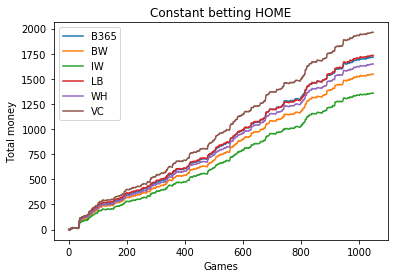

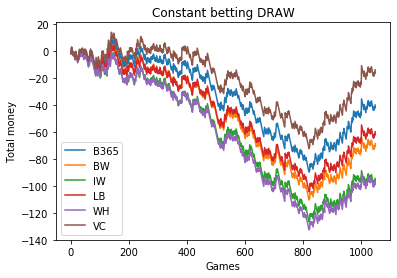

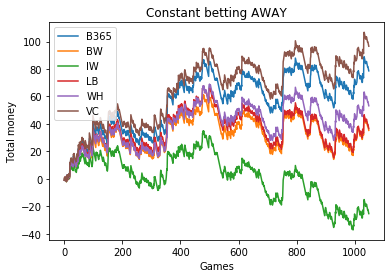

In [4]:
for bk in bookmakers:
    predict_constant(X_test, y_test, 2, bk)
    
plt.legend()
plt.xlabel("Games")
plt.ylabel("Total money")
plt.title("Constant betting HOME")
plt.show()

for bk in bookmakers:
    predict_constant(X_test, y_test, 1, bk)
    
plt.legend()
plt.xlabel("Games")
plt.ylabel("Total money")
plt.title("Constant betting DRAW")
plt.show()

for bk in bookmakers:
    predict_constant(X_test, y_test, 0, bk)
    
plt.legend()
plt.xlabel("Games")
plt.ylabel("Total money")
plt.title("Constant betting AWAY")
plt.show()

## Make predictions using our neural network

In [5]:
def bet_on_prediction(X_test, y_test, predictions, bookmaker):
    money = 0
    money_on_bet = 1
    money_states = []
    
    for index, prediction in enumerate(predictions):

        coefficients = [X_test.iloc[index][bookmaker + "H"], X_test.iloc[index][bookmaker + "D"], X_test.iloc[index][bookmaker + "A"]]
        
        # make a bet
        money -= money_on_bet
        
        # win money
        if prediction == y_test.iloc[index]:
            money += money_on_bet * coefficients[prediction]
            
        money_states.append(money)
        
    plt.plot(money_states, label=bookmaker)
    
    return money

Text(0.5, 1.0, 'Always betting on result predicted by neural network')

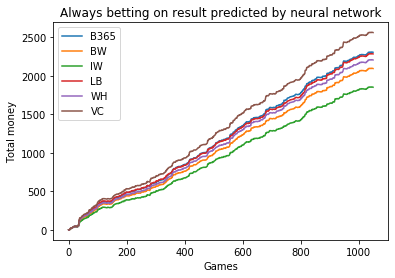

In [6]:
predictions = np.argmax(model.predict(X_test), axis=1)

for bk in bookmakers:
    bet_on_prediction(X_test, y_test, predictions, bk)
    
plt.legend()
plt.xlabel("Games")
plt.ylabel("Total money")
plt.title("Always betting on result predicted by neural network")